# Advanced Regression Assignment - Surprise Housing

### Problem Statement -Part 1
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

   - How well those variables describe the price of a house.

   - Also, determine the optimal value of lambda for ridge and lasso regression.
   
### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Approach

### - Data understanding and Exploration

### - Data Treatment
      - removing columns with high no of missing values 
      - missing value imputation
      - derived features creation (convert the year columns into age cols)
      
### - EDA - find the variables which are significant to the target variable
      - pairplot  - numerical vars with target variable 
      - heatmap   - numerical variables - multicollinearity, target variable dependence
      - goal    --> analyze which variables are significant visually
### - Feature engineering
      - label encoding 
      - one hot encoding
      - target variable tarnsformation to normalize      
### - Model Building
      - Train-Test split (70%-30%)
      - Scale data using Standard scaler
      - Create X and y
      - RFE [top 50 features]
      - Build model for Lasso and Ridge
      - Perform Gridsearch to get optimal values for lambda
      - Re-run the model on test dataset using lambda optimal
      
### - Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime

%matplotlib inline

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [2]:
data = pd.read_csv('/Users/sriivatsav/Desktop/UpGrad/Machine_Learning_2/Advanced_Regression/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Data understanding and Exploration

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
# checking null values
NA_col = data.isnull().sum()
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(data),2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


### Data Treatment
      - removing columns with high no of missing values 
      - missing value imputation
      - derived features creation (convert the year columns into age cols)

In [8]:
# Dropping columns which have high values missing + I
data.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'MoSold','Street', 'Utilities'], axis=1, inplace = True)

In [9]:
data.shape

(1460, 71)

In [10]:
# checking null values
NA_col = data.isnull().sum()
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(data),2))

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64


In [11]:
# Converting years to age
data['YearBuilt_Age'] = data['YearBuilt'].max() - data['YearBuilt']
data['YearRemodAdd_Age'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
data['YrSold_Age'] = data['YrSold'].max() - data['YrSold']
data['GarageYrBlt_Age'] = data['GarageYrBlt'].max() - data['GarageYrBlt']

# Dropping columns
data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [12]:
data[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


#### Impute missing values

In [13]:
def treat_Missing_Values(df):    
    
    # checking null values
    NA_col = df.isnull().sum()
    # find out columns which have nulls
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(data[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)
            
    return df

In [14]:
data = treat_Missing_Values(data)

In [15]:
# checking null values
round(data.isnull().sum()/len(data.index),2)[round(data.isnull().sum()/ len(data.index),2).values>0.00]

Series([], dtype: float64)

### EDA - find the variables which are significant to the target variable

#### Heatmap

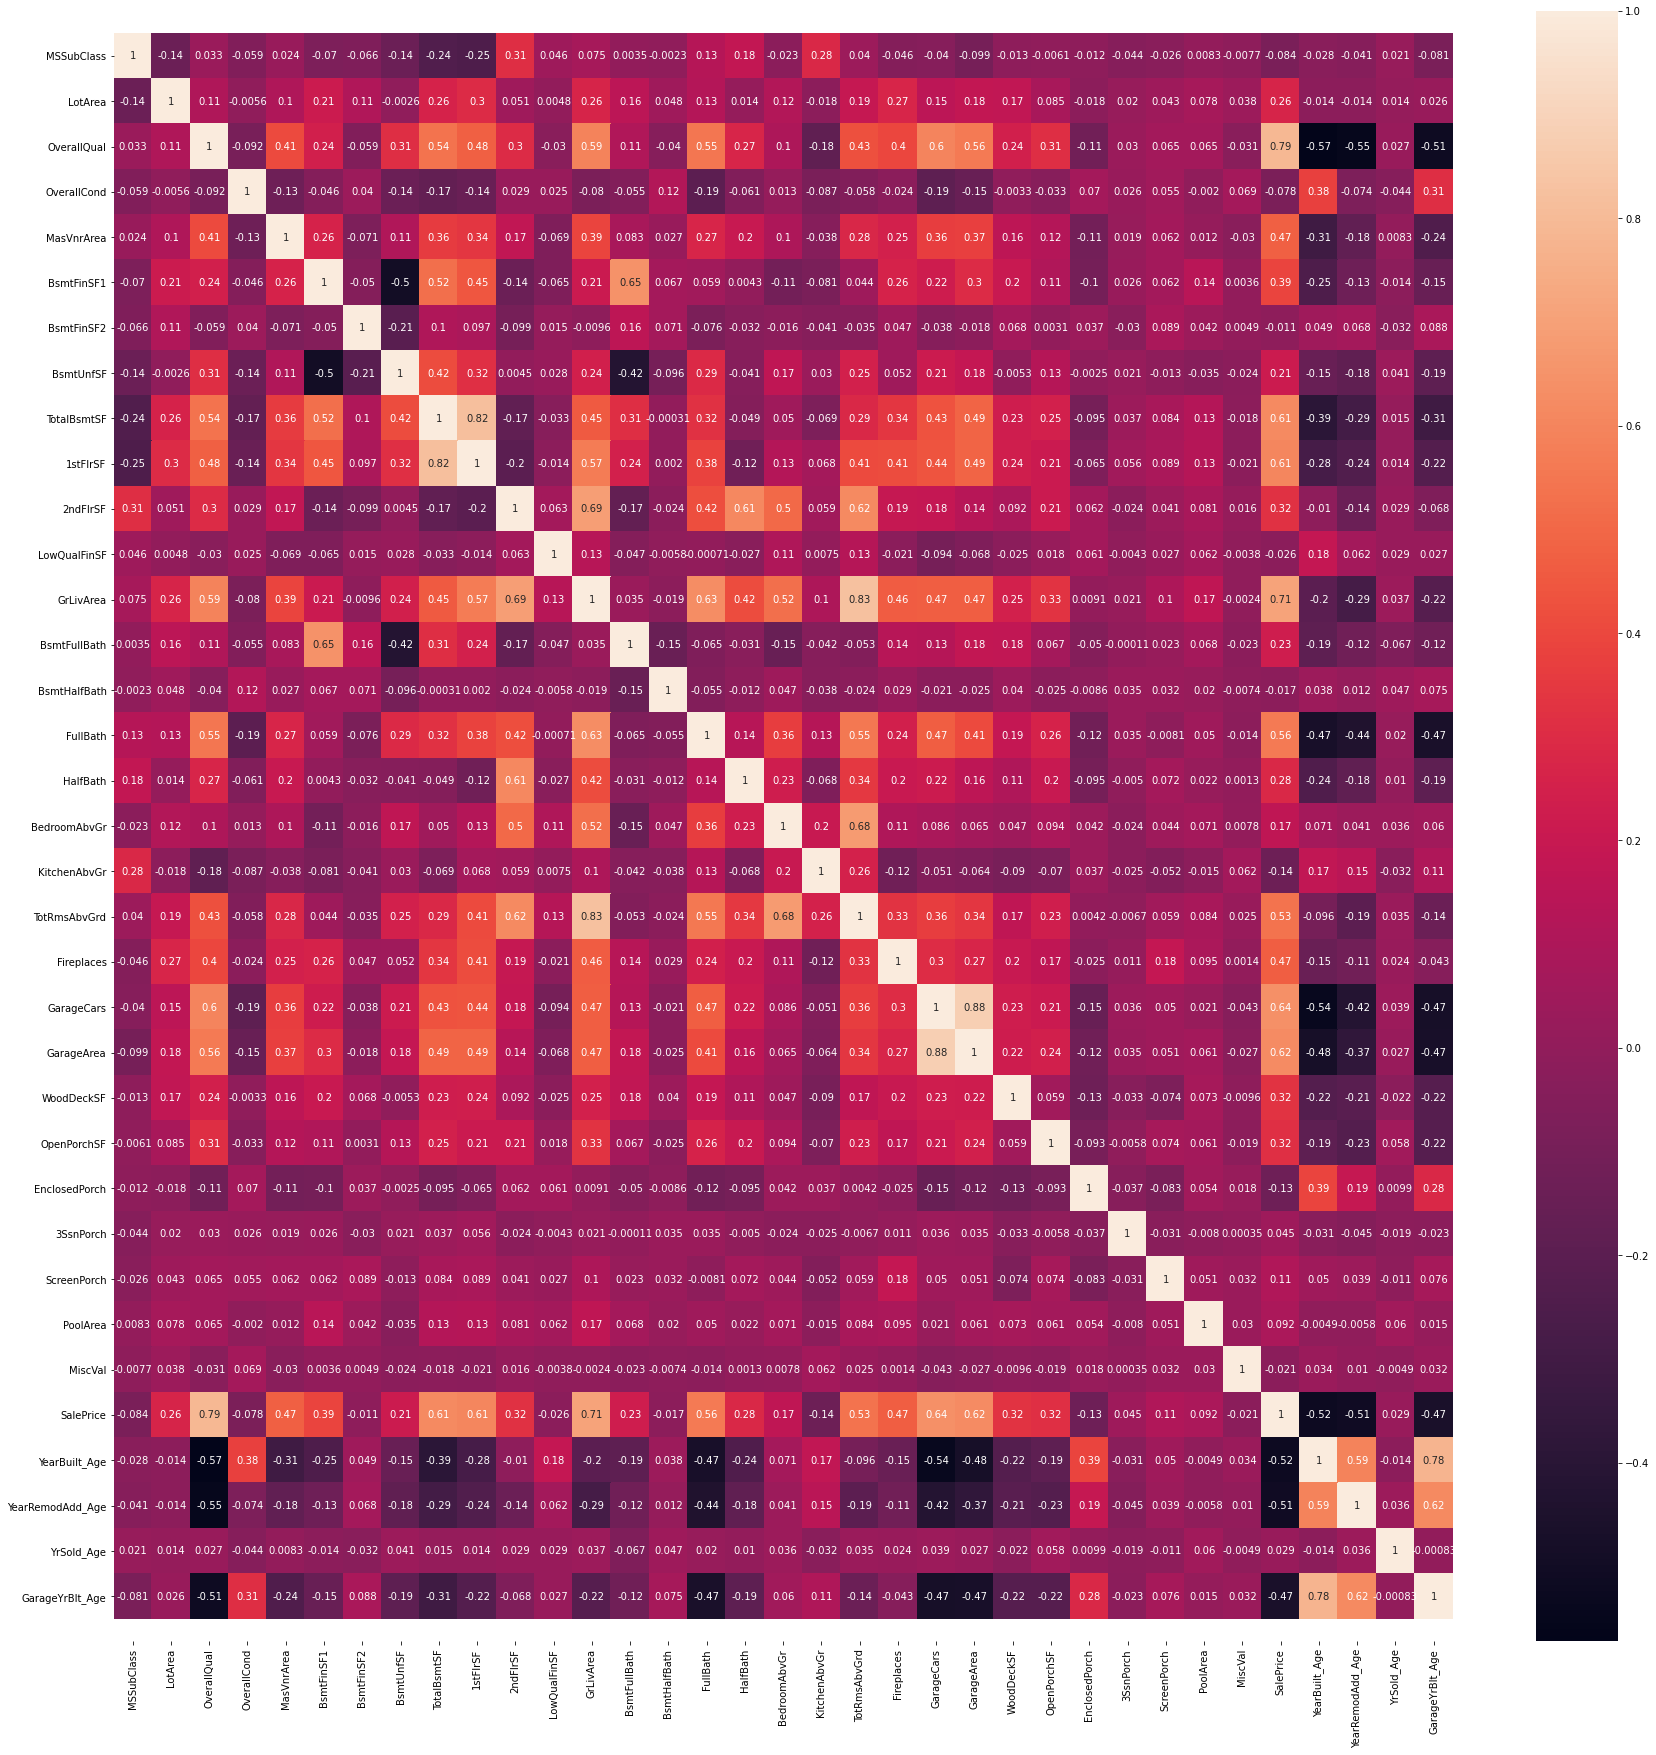

In [16]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [17]:
corr_val = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()

In [18]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


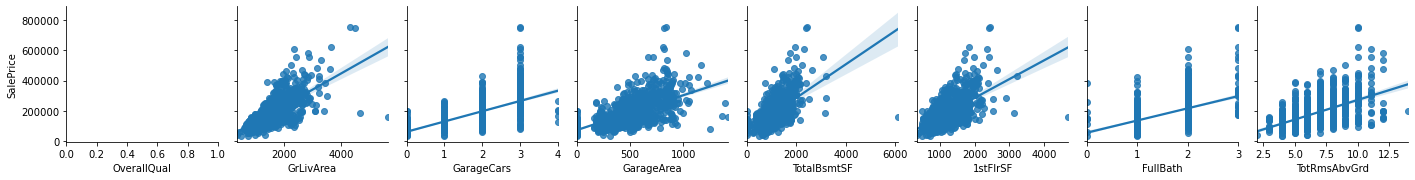

In [19]:
# Draw Pair plot for the correlated features
sns.pairplot(data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

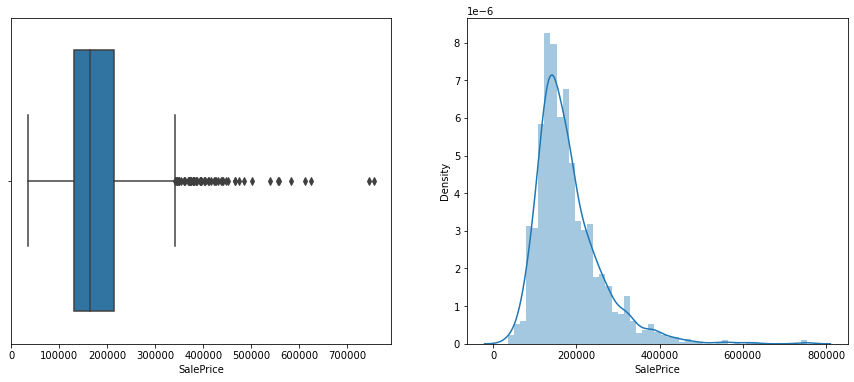

In [20]:
# Let us check the SalePrice as well
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(data['SalePrice'], ax=axes[1])
plt.show()

### Feature engineering

#### Label Encoding

In [21]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = data[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        data[colName] = data[colName].map(map_vals)

In [22]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']
label_encoding(cat_col_list)

In [23]:
data[cat_col_list].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1


#### One Hot Encoding

In [24]:
dummy_col_names = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummies = pd.get_dummies(data[dummy_col_names], drop_first = True)
data = pd.concat([data, dummies], axis = 1)
data.drop(dummy_col_names, axis = 1, inplace = True)

In [25]:
data.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,0,0,7,5,196.0,0,0,0,0,0,0,706,0,0,150,856,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,2,548,0,0,0,61,0,0,0,0,0,208500,7,7,2,7.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,0,0,6,8,0.0,1,0,0,0,1,1,978,0,0,284,1262,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,1,0,2,460,0,0,298,0,0,0,0,0,0,181500,34,34,3,34.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,1,0,7,5,162.0,0,0,0,0,2,0,486,0,0,

In [26]:
data.shape

(1460, 195)

#### Target variable transformation

In [27]:
# Transform SalePrice
data['SalePrice'] = np.log1p(data['SalePrice'])

### Model Building

In [28]:
# Create train and test data
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
# Scale data
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [30]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.473765,0,0,-0.779861,0.383154,-0.558025,1,0,1,0,0,3,0.043512,0,-0.293313,-0.374367,-0.430911,2,1,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,1,-0.935650,-0.925422,1,-2.366798,-2.217786,0,0,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-1.335436,85,60,2,30.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.035976,-0.056845,0,1,0.649651,-0.533005,0.809137,0,0,0,0,1,0,1.160345,0,-0.293313,-0.454644,0.621579,0,0,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0,1.556976,0.623522,0,1.645101,0.867506,0,0,1.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

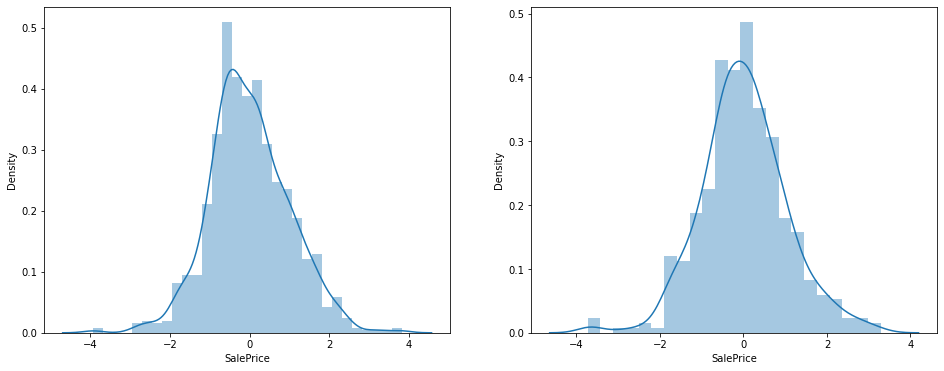

In [31]:
# Let us check if the target variable is normal in both train and test dataset
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [32]:
# Create X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [33]:
# RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [34]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [35]:
col = X_train.columns[rfe.support_]

In [36]:
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRNe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRNn',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_VinylSd',
       'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Functional_Min1', 'Functional_Min2', 'Functional_Sev',
       'Functional_Typ', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       'S

In [37]:
# Modify the X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

In [38]:
X_train.shape

(1021, 50)

In [39]:
X_test.shape

(438, 50)

### Lasso Regression model

In [40]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.858826086735921
0.8418708757465001


In [41]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -1.251),
 ('OverallQual', 0.392),
 ('BsmtFinSF1', 0.108),
 ('BsmtFinSF2', 0.048),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.061),
 ('CentralAir', -0.452),
 ('GrLivArea', 0.36),
 ('MSZoning_FV', 0.167),
 ('MSZoning_RH', 0.209),
 ('MSZoning_RL', 0.454),
 ('MSZoning_RM', 0.098),
 ('Neighborhood_Crawfor', 0.294),
 ('Neighborhood_MeadowV', -0.25),
 ('Neighborhood_NridgHt', 0.225),
 ('Neighborhood_Somerst', 0.348),
 ('Condition1_Norm', 0.191),
 ('Condition1_PosA', 0.246),
 ('Condition1_RRNe', 0.0),
 ('Condition2_PosA', 0.0),
 ('Condition2_PosN', -2.767),
 ('Condition2_RRAe', -0.0),
 ('Condition2_RRNn', 0.0),
 ('HouseStyle_2.5Fin', -0.0),
 ('RoofStyle_Shed', 0.0),
 ('RoofMatl_CompShg', 0.16),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', 0.0),
 ('RoofMatl_Roll', -0.0),
 ('RoofMatl_Tar&Grv', 0.114),
 ('RoofMatl_WdShake', 0.0),
 ('RoofMatl_WdShngl', 0.466),
 ('Exterior1st_AsphShn', -0.0),
 ('Exterior1st_BrkComm', -0.313),
 ('Exterior1st_VinylSd', 0.188),
 ('Exterior2nd_AsphShn', 

In [42]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [43]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005479,0.001106,0.002115,0.000398,0.001,{'alpha': 0.001},0.869329,0.337796,0.871634,0.686704,0.897114,0.885055,0.867722,0.860028,0.857021,0.857540,0.798994,0.163650,1,0.855685,0.897419,0.859226,0.860016,0.856528,0.855179,0.854318,0.861583,0.860986,0.860190,0.862113,0.012024
1,0.002764,0.000127,0.001484,0.000053,0.010,{'alpha': 0.01},0.839186,0.399583,0.850488,0.679667,0.878351,0.865576,0.823722,0.856165,0.832860,0.840466,0.786606,0.139276,2,0.812047,0.852574,0.812878,0.826780,0.807118,0.808456,0.811292,0.810616,0.813542,0.813224,0.816853,0.012933
2,0.002789,0.000401,0.001616,0.000261,0.100,{'alpha': 0.1},0.775226,0.471224,0.755550,0.607634,0.807246,0.784769,0.710074,0.783064,0.734067,0.782906,0.721176,0.099425,3,0.731166,0.783768,0.739145,0.756361,0.728754,0.733260,0.741637,0.734993,0.738507,0.733208,0.742080,0.015706
3,0.002764,0.000532,0.001594,0.000174,1.000,{'alpha': 1.0},-0.015358,-0.033031,-0.002682,-0.002716,-0.055402,-0.003338,-0.004699,-0.001490,-0.000359,-0.001537,-0.012061,0.017303,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002425,0.000078,0.001445,0.000059,5.000,{'alpha': 5.0},-0.015358,-0.033031,-0.002682,-0.002716,-0.055402,-0.003338,-0.004699,-0.001490,-0.000359,-0.001537,-0.012061,0.017303,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

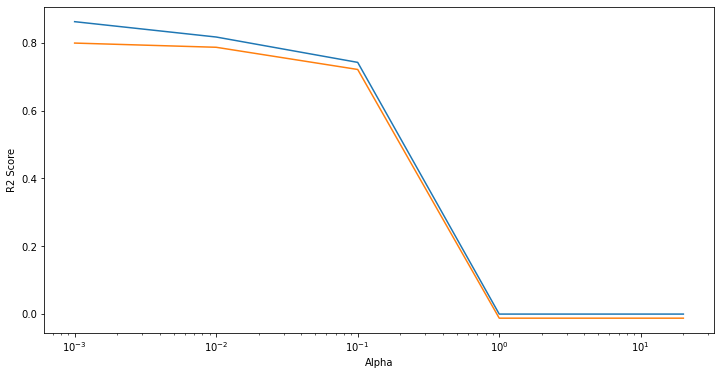

In [45]:
r2_score(cv_result_train_lasso, True)

In [46]:
print('For Lasso, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Lasso, the Best Alpha value =  0.001


In [47]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.858826086735921
0.8418708757465001


### Lasso Results on Test dataset
    *** R2 score = 0.87 ***

### Ridge Regression Model

In [48]:
#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.909020480964631
0.8272560689645743


In [49]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003283,0.000674,0.001877,0.000204,0.001,{'alpha': 0.001},0.895254,0.334100,0.882974,0.619801,0.326752,0.898703,0.468292,0.196758,0.864410,0.863958,0.635100,0.266355,7,0.909438,0.909751,0.910479,0.910532,0.905927,0.909331,0.907670,0.909266,0.910948,0.912436,0.909578,0.001701
1,0.002387,0.000073,0.001508,0.000080,0.010,{'alpha': 0.01},0.895257,0.335006,0.882817,0.626392,0.406100,0.898909,0.533395,0.285129,0.864124,0.863640,0.659077,0.239368,6,0.909036,0.909747,0.910092,0.910163,0.905627,0.908930,0.907355,0.908979,0.910558,0.912043,0.909253,0.001680
2,0.002520,0.000288,0.001563,0.000155,0.100,{'alpha': 0.1},0.892331,0.343163,0.878187,0.655417,0.726073,0.898019,0.787036,0.650378,0.859190,0.860139,0.754994,0.163931,5,0.897615,0.909409,0.899121,0.899659,0.895996,0.897474,0.897145,0.899648,0.899564,0.900841,0.899647,0.003542
3,0.002921,0.000386,0.001732,0.000232,1.000,{'alpha': 1.0},0.880063,0.380804,0.869251,0.679642,0.891943,0.893114,0.882693,0.853381,0.854012,0.857316,0.804222,0.153053,3,0.865984,0.900808,0.868493,0.873115,0.864353,0.865115,0.864330,0.868546,0.869219,0.869386,0.870935,0.010293
4,0.002455,0.000154,0.001517,0.000083,5.000,{'alpha': 5.0},0.866858,0.404963,0.869142,0.685062,0.896696,0.885844,0.868733,0.868062,0.854721,0.856808,0.805689,0.145082,1,0.846479,0.884382,0.848610,0.859356,0.843489,0.844825,0.845207,0.847890,0.849367,0.848974,0.851858,0.011608


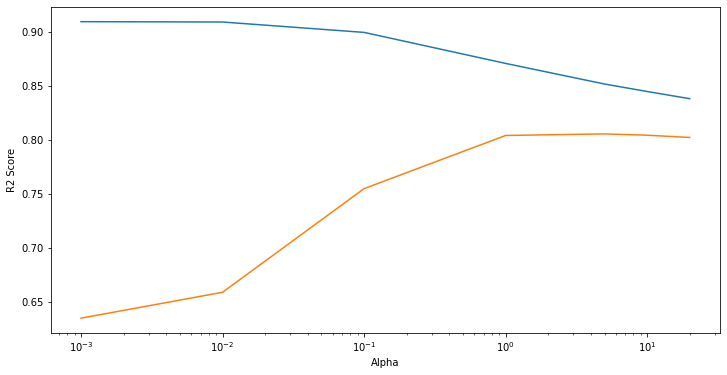

In [51]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

In [52]:
print('For Ridge, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Ridge, the Best Alpha value =  5.0


In [53]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.8439358577661524
0.8543929777808856


In [54]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -0.998),
 ('OverallQual', 0.405),
 ('BsmtFinSF1', 0.085),
 ('BsmtFinSF2', 0.041),
 ('BsmtUnfSF', -0.018),
 ('TotalBsmtSF', 0.083),
 ('CentralAir', -0.406),
 ('GrLivArea', 0.34),
 ('MSZoning_FV', 0.122),
 ('MSZoning_RH', 0.086),
 ('MSZoning_RL', 0.327),
 ('MSZoning_RM', -0.033),
 ('Neighborhood_Crawfor', 0.253),
 ('Neighborhood_MeadowV', -0.139),
 ('Neighborhood_NridgHt', 0.21),
 ('Neighborhood_Somerst', 0.265),
 ('Condition1_Norm', 0.188),
 ('Condition1_PosA', 0.153),
 ('Condition1_RRNe', 0.045),
 ('Condition2_PosA', 0.031),
 ('Condition2_PosN', -0.329),
 ('Condition2_RRAe', -0.006),
 ('Condition2_RRNn', 0.042),
 ('HouseStyle_2.5Fin', -0.045),
 ('RoofStyle_Shed', 0.054),
 ('RoofMatl_CompShg', 0.099),
 ('RoofMatl_Membran', 0.069),
 ('RoofMatl_Metal', 0.049),
 ('RoofMatl_Roll', -0.01),
 ('RoofMatl_Tar&Grv', 0.088),
 ('RoofMatl_WdShake', 0.048),
 ('RoofMatl_WdShngl', 0.191),
 ('Exterior1st_AsphShn', -0.037),
 ('Exterior1st_BrkComm', -0.135),
 ('Exterior1st_VinylSd', 0.193),


### Ridge Results on Test dataset
    *** R2 score = 0.88 *** 
    - This is very close to Lasso result as well

In [55]:
def run_multiple_alphas(model,alphas):
    
    feature_ridge_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    feature_lasso_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    
    for alpha in alphas:
        if model == 'ridge':
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_ridge_df['Alpha: '+str(alpha)] = ridge.coef_
        elif model == 'lasso':
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_lasso_df['Alpha: '+str(alpha)] = lasso.coef_
    
    if model == 'ridge':
        return feature_ridge_df
    else:
        return feature_lasso_df

In [56]:
lasso_df = run_multiple_alphas('lasso',[0.001,0.002,0.01,0.02,0.05,5])

In [57]:
lasso_df.head()

,feature,Alpha: 0.001,Alpha: 0.002,Alpha: 0.01,Alpha: 0.02,Alpha: 0.05,Alpha: 5
0,OverallQual,0.391677,0.407174,0.472250,0.501605,0.531894,0.0
1,BsmtFinSF1,0.108125,0.105796,0.090522,0.080132,0.059751,0.0
2,BsmtFinSF2,0.048034,0.043951,0.026023,0.012401,0.000000,0.0
3,BsmtUnfSF,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0
4,TotalBsmtSF,0.061100,0.061468,0.081024,0.096066,0.115459,0.0


In [58]:
print(lasso_df[lasso_df['Alpha: 0.001'] == 0][['feature', 'Alpha: 0.001']].shape)
print(lasso_df[lasso_df['Alpha: 0.002'] == 0][['feature', 'Alpha: 0.002']].shape)
print(lasso_df[lasso_df['Alpha: 0.01'] == 0][['feature', 'Alpha: 0.01']].shape)
print(lasso_df[lasso_df['Alpha: 0.02'] == 0][['feature', 'Alpha: 0.02']].shape)
print(lasso_df[lasso_df['Alpha: 0.05'] == 0][['feature', 'Alpha: 0.05']].shape)
print(lasso_df[lasso_df['Alpha: 5'] == 0][['feature', 'Alpha: 5']].shape)

(17, 2)
(22, 2)
(35, 2)
(40, 2)
(44, 2)
(50, 2)


### Conclusion - For Lasso, As we increase the alpha, more coefficients become zero 

#### Lasso alphas

In [59]:
# We know alpha = 0.001 is optimal value
lasso_df = lasso_df[['feature','Alpha: 0.001', 'Alpha: 0.002']]
lasso_df = lasso_df.reindex(lasso_df['Alpha: 0.002'].abs().sort_values(ascending=False).index)
lasso_df['predictors'] = lasso_df['feature'].apply(lambda x:x.split('_')[0])

In [60]:
lasso_df.head(10)

,feature,Alpha: 0.001,Alpha: 0.002,predictors
19,Condition2_PosN,-2.767321,-1.606020,Condition2
5,CentralAir,-0.452021,-0.434343,CentralAir
0,OverallQual,0.391677,0.407174,OverallQual
14,Neighborhood_Somerst,0.348152,0.366182,Neighborhood
9,MSZoning_RL,0.454056,0.351638,MSZoning
6,GrLivArea,0.359761,0.350156,GrLivArea
36,Exterior2nd_Stucco,-0.387627,-0.302994,Exterior2nd
11,Neighborhood_Crawfor,0.293563,0.272076,Neighborhood
13,Neighborhood_NridgHt,0.224933,0.208487,Neighborhood
48,SaleCondition_Normal,0.208590,0.193381,SaleCondition


In [61]:
x = lasso_df[['feature','Alpha: 0.002','predictors']]

#### Ridge alphas

In [62]:
ridge_df = run_multiple_alphas('ridge',[10,20])

In [63]:
ridge_df.head()

,feature,Alpha: 10,Alpha: 20
0,OverallQual,0.405312,0.415914
1,BsmtFinSF1,0.084604,0.086336
2,BsmtFinSF2,0.041031,0.039833
3,BsmtUnfSF,-0.018482,-0.016235
4,TotalBsmtSF,0.082880,0.086384


In [64]:
# We know alpha = 10 is optimal value
ridge_df = ridge_df[['feature','Alpha: 10','Alpha: 20']]
ridge_df = ridge_df.reindex(ridge_df['Alpha: 20'].abs().sort_values(ascending=False).index)
ridge_df['predictors'] = ridge_df['feature'].apply(lambda x:x.split('_')[0])

In [65]:
ridge_df.head(10)

,feature,Alpha: 10,Alpha: 20,predictors
0,OverallQual,0.405312,0.415914,OverallQual
5,CentralAir,-0.406058,-0.360165,CentralAir
6,GrLivArea,0.340315,0.331607,GrLivArea
9,MSZoning_RL,0.326588,0.258580,MSZoning
14,Neighborhood_Somerst,0.265103,0.206468,Neighborhood
11,Neighborhood_Crawfor,0.252851,0.197998,Neighborhood
36,Exterior2nd_Stucco,-0.262342,-0.191855,Exterior2nd
33,Exterior1st_VinylSd,0.193029,0.189019,Exterior1st
48,SaleCondition_Normal,0.202026,0.178961,SaleCondition
13,Neighborhood_NridgHt,0.209805,0.175859,Neighborhood
